# Import

In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the CSV file into a DataFrame
df = pd.read_csv('data/reviews.csv')

# Data Understanding
## Print dataframe

In [34]:
# Display the first few rows of the DataFrame to verify the data
print(df.head())

   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  


## Count missing values per column

In [35]:
def count_missing_values(df):
    """
    Count the number of missing values for each column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.Series: A Series with columns as index and the count of missing values as values.
    """
    missing_counts = df.isna().sum()
    return missing_counts

missing_counts = count_missing_values(df)
print(missing_counts)

listing_id          0
id                  0
date             7500
reviewer_id         0
reviewer_name       0
comments           18
dtype: int64


# Data preparation
## Remove lines with missing date

Missing values in date can affect time-series analysis or chronological ordering. Removing rows with missing date values is necessary.
Missing values in comment don't affect the analysis.
Therefor only missing values from the date column need to be removed.

In [36]:
def remove_rows_with_missing_dates(df):
    """
    Remove rows from the DataFrame where the 'date' column has missing values.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: A new DataFrame with rows where 'date' is missing removed.
    """
    # Drop rows where 'date' column has NaN values
    cleaned_df = df.dropna(subset=['date'])
    
    return cleaned_df

df = remove_rows_with_missing_dates(df)

# Analysis
## Reviews per listing

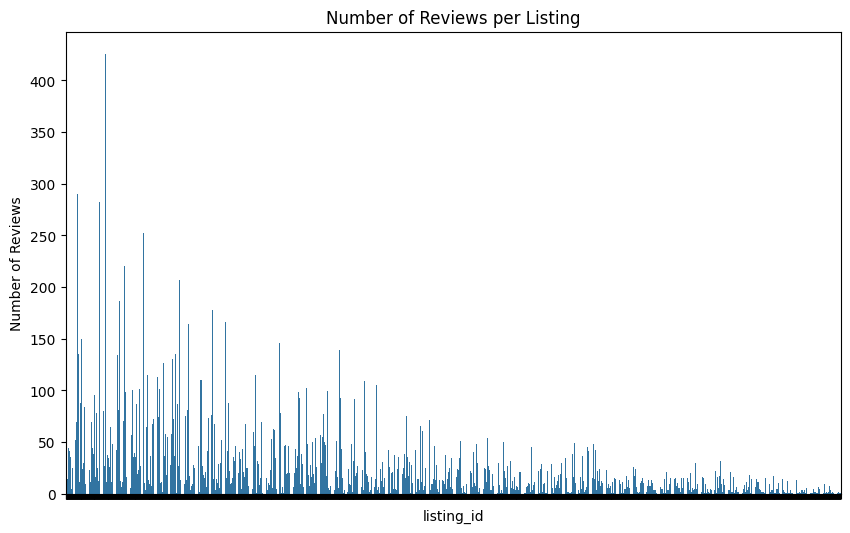

In [37]:
# Analysis 1: Number of reviews per listing
plt.figure(figsize=(10, 6))
review_counts = df['listing_id'].value_counts()
ax = sns.barplot(x=review_counts.index, y=review_counts.values)
plt.title('Number of Reviews per Listing')
plt.ylabel('Number of Reviews')
ax.set_xticklabels([])  # Remove x labels
plt.show()

## Reviews over time

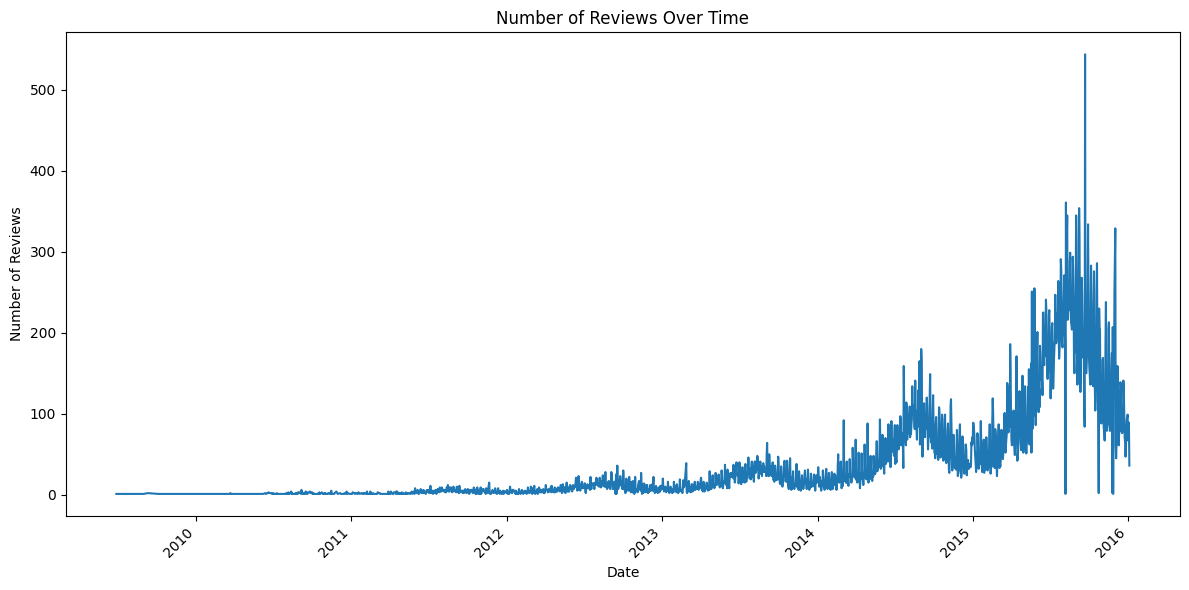

In [38]:
# Analysis 2: Reviews over time
plt.figure(figsize=(12, 6))
df['date'] = pd.to_datetime(df['date'])
df['date'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top reviewers

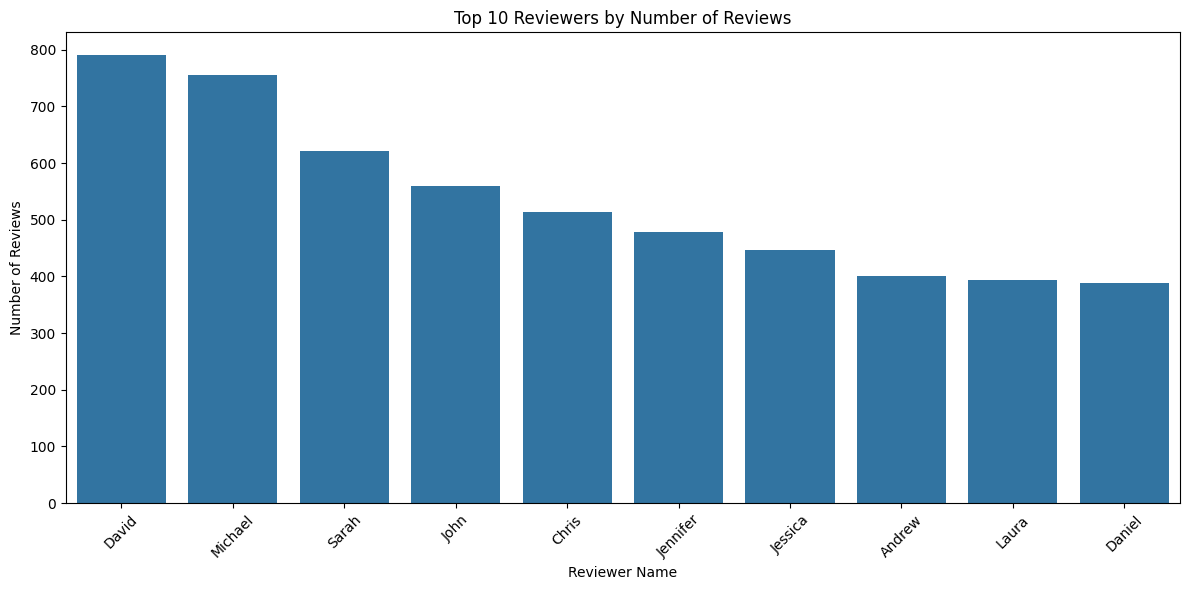

In [39]:
# Analysis 3: Top reviewers by number of reviews
plt.figure(figsize=(12, 6))
top_reviewers = df['reviewer_name'].value_counts().nlargest(10)
sns.barplot(x=top_reviewers.index, y=top_reviewers.values)
plt.title('Top 10 Reviewers by Number of Reviews')
plt.xlabel('Reviewer Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Distribution of review counts

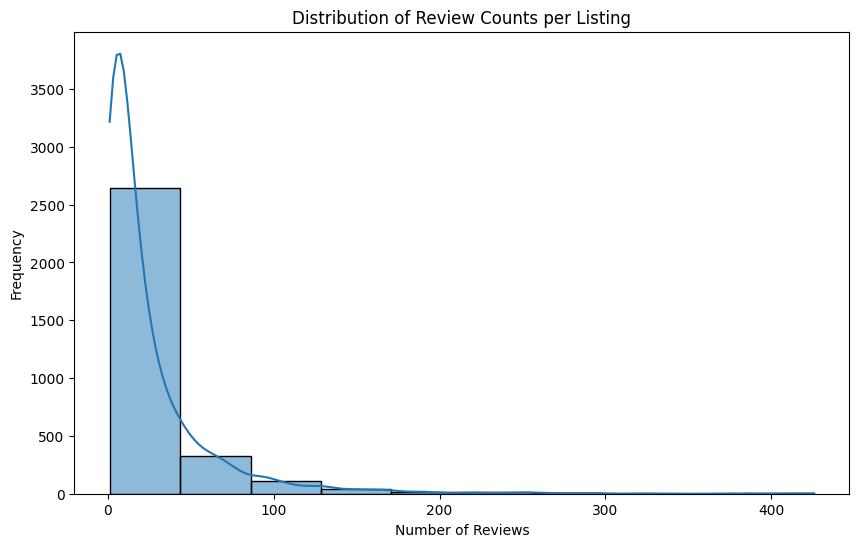

In [40]:
# Analysis 4: Distribution of review counts per listing
plt.figure(figsize=(10, 6))
sns.histplot(df['listing_id'].value_counts(), bins=10, kde=True)
plt.title('Distribution of Review Counts per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

## Wordcloud

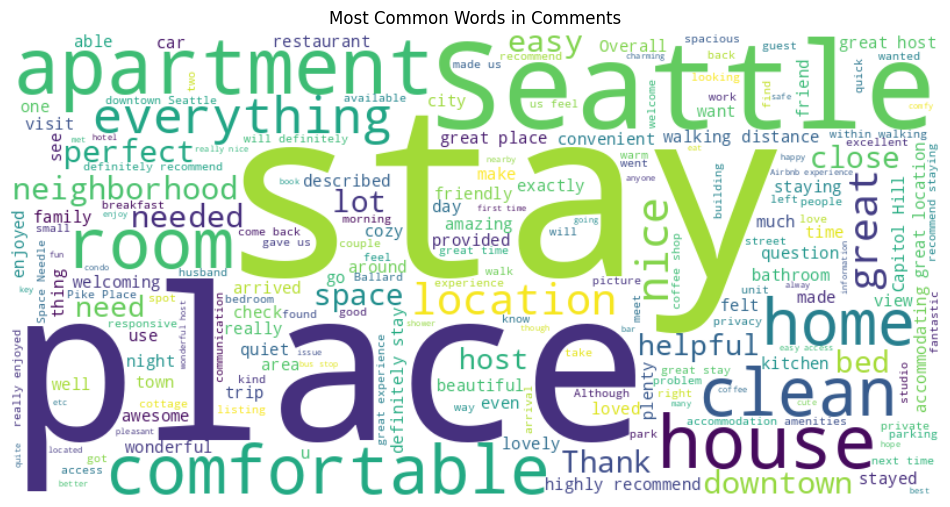

In [41]:
# Analysis 5: Word cloud of most common words in comments
plt.figure(figsize=(12, 8))
df['comments'] = df['comments'].fillna('').astype(str)
text = ' '.join(df['comments'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Comments')
plt.show()